<table>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        Originially prepared for Bronze Material of QWorld by <br>
        Abuzer Yakaryilmaz and Özlem Salehi <br>
        Modified for CENG798 by Cenk Tüysüz
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h3> Superdense Coding </h3>

Superdense coding is the process of transmitting classical information using quantum communication and previously entangled qubits.

<h3> Protocol </h3>

After having the entanglement, Balvis takes his qubit and goes away.

Asja will send two classical bits of information by only sending her qubit.

Now, we describe this protocol.

Asja has two bits of classical information: $ x,y \in \{0,1\} $. 

There are four possible values for the pair $ (x,y) $:  $ (0,0), (0,1), (1,0),\mbox{ or } (1,1) $. 

If $x$ is 1, then Asja applies z-gate, i.e., $ Z = \Z $, to her qubit.

If $y$ is 1, then Asja applies x-gate (NOT operator) to her qubit.

Then, Asja sends her qubit to Balvis.

<h3> After the communication </h3>

Balvis has both qubits.

Balvis applies cx-gate (CNOT operator), where Asja's qubit is the controller.

Then, Balvis applies h-gate (Hadamard operator) to Asja's qubit.

Balvis measures both qubits. 

The measurement result will be exactly $ (x,y) $.

Let' implement the Superdense coding protocol in Qiskit

In [1]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
    qreg = QuantumRegister(2) # quantum register with 2 qubits
    creg = ClassicalRegister(2) # classical register with 2 bits
    mycircuit = QuantumCircuit(qreg,creg) # quantum circuit with quantum and classical registers

    # apply h-gate (Hadamard) to the first qubit.
    mycircuit.h(qreg[0])

    # apply cx-gate (CNOT) with parameters first-qubit and second-qubit.
    mycircuit.cx(qreg[0],qreg[1])

    # they are separated now.

    # if a is 1, then apply z-gate to the first qubit.
    if pair[0]=='1': 
        mycircuit.z(qreg[0])
    
    # if b is 1, then apply x-gate (NOT) to the first qubit.
    if pair[1]=='1': 
        mycircuit.x(qreg[0])
    
    # Asja sends her qubit to Balvis.
    
    #  apply cx-gate (CNOT) with parameters first-qubit and second-qubit.
    mycircuit.cx(qreg[0],qreg[1])
    
    # apply h-gate (Hadamard) to the first qubit.
    mycircuit.h(qreg[0])
    
    # measure both qubits
    mycircuit.measure(qreg,creg)
    
    # compare the results with pair (a,b)
    job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=1)
    counts = job.result().get_counts(mycircuit)
    for outcome in counts:
        reverse_outcome = ''
        for i in outcome:
            reverse_outcome = i + reverse_outcome
        print("(a,b) is",pair,": ",reverse_outcome,"is observed")

(a,b) is 00 :  00 is observed
(a,b) is 01 :  01 is observed
(a,b) is 10 :  10 is observed
(a,b) is 11 :  11 is observed


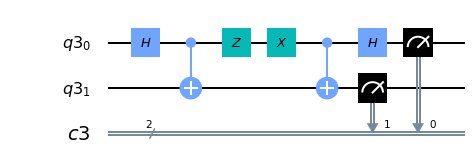

In [2]:
mycircuit.draw(output='mpl')